In [1]:
## ML 2 PROJECT - ACCIDENTS PREDICTION FOR PREVENTION MODEL (APFP-MODEL) - Columbia, South Carolina 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import scale

In [2]:
# read csv files
df= pd.read_csv('accidents_yc.csv')

## Exploratory Analysis

In [4]:
df.describe()

,Severity,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,35018.000000,35018.000000,35018.000000,34797.000000,24465.000000,34797.000000,34879.000000,34793.000000,31909.000000,25409.000000
mean,2.202096,34.063554,-81.003809,67.228183,66.055422,63.573584,29.930209,9.108377,5.577812,0.009688
std,0.445145,0.051522,0.090695,16.254953,17.413239,22.887452,0.201240,2.224899,4.333137,0.053631
min,1.000000,33.894630,-81.255432,16.000000,1.000000,12.000000,29.200000,0.000000,0.000000,0.000000
25%,2.000000,34.036964,-81.095465,55.000000,53.000000,44.000000,29.790000,10.000000,3.000000,0.000000
50%,2.000000,34.065128,-80.973751,69.000000,68.000000,63.000000,29.920000,10.000000,5.000000,0.000000
75%,2.000000,34.097625,-80.935530,80.000000,79.000000,86.000000,30.060000,10.000000,8.000000,0.000000
max,4.000000,34.194626,-80.703995,103.000000,103.000000,100.000000,30.800000,10.000000,43.000000,1.600000


In [12]:
len(df)

35018

In [5]:
## Checking for missing values

In [6]:
df.isna().sum()

Severity                 0
Start_Lat                0
Start_Lng                0
City                     0
State                    0
Weather_Timestamp      102
Temperature(F)         221
Wind_Chill(F)        10553
Humidity(%)            221
Pressure(in)           139
Visibility(mi)         225
Wind_Direction         322
Wind_Speed(mph)       3109
Precipitation(in)     9609
Weather_Condition      343
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Stop                     0
Sunrise_Sunset           0
dtype: int64

In [3]:
## Dropping NAs
df2 = df.dropna()

In [4]:
df2.isna().sum()

Severity             0
Start_Lat            0
Start_Lng            0
City                 0
State                0
Weather_Timestamp    0
Temperature(F)       0
Wind_Chill(F)        0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Direction       0
Wind_Speed(mph)      0
Precipitation(in)    0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Stop                 0
Sunrise_Sunset       0
dtype: int64

In [4]:
## Checking for data left
len(df2) 

23672

In [10]:
# Visualize distribution of Accidents severity (target var)

In [5]:
severity_counts = df2['Severity'].value_counts().sort_index()
print(severity_counts)

1      268
2    20045
3     3076
4      283
Name: Severity, dtype: int64


In [6]:
severity_percentage = (severity_counts/len(df2))*100
print(round(severity_percentage,2))

1     1.13
2    84.68
3    12.99
4     1.20
Name: Severity, dtype: float64


In [4]:
## We need to recode the target variable such that if severity = 1 or 2, severity = 0 and severity = 1 otherwise
import pandas as pd

df2['Severity'] = df2['Severity'].apply(lambda x: 0 if x in [1, 2] else 1)


/var/folders/84/qq95gfbj1s5d3j1zwg6g04v00000gn/T/ipykernel_34278/313663314.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Severity'] = df2['Severity'].apply(lambda x: 0 if x in [1, 2] else 1)


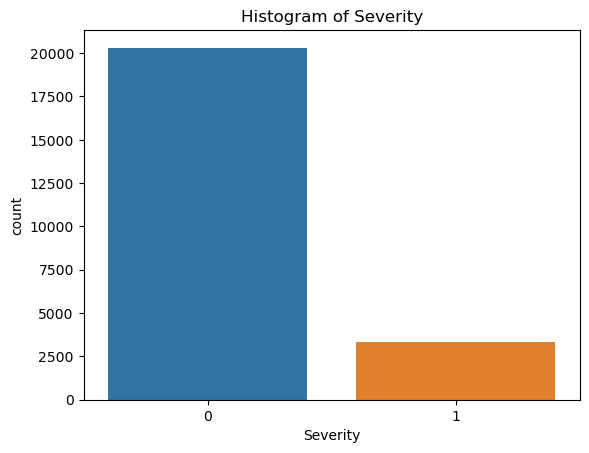

In [7]:
# Distribution of accident's sevirity 
import seaborn as sns
import matplotlib.pyplot as plt

#histogram
sns.countplot(data=df2, x='Severity')
plt.title('Histogram of Severity')
plt.show()


In [8]:
severity_counts = df2['Severity'].value_counts().sort_index()
print(severity_counts)

0    20313
1     3359
Name: Severity, dtype: int64


In [9]:
severity_percentage = (severity_counts/len(df2))*100
print(round(severity_percentage,2))

0    85.81
1    14.19
Name: Severity, dtype: float64


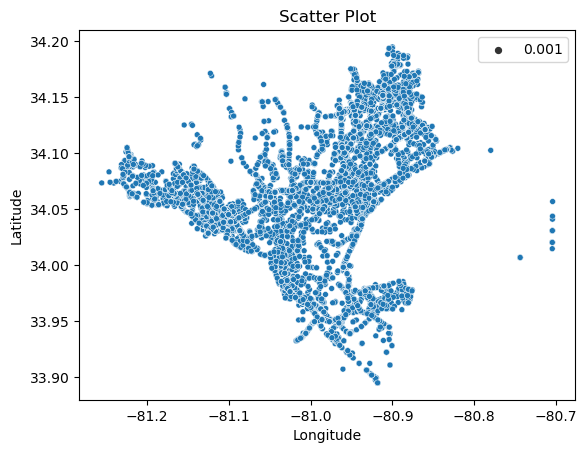

In [10]:
## Scatter plot of the long and lats
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the scatter plot
sns.scatterplot(x=df2.Start_Lng, y=df2.Start_Lat, size=0.001)

plt.title('Scatter Plot')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


<Axes: >

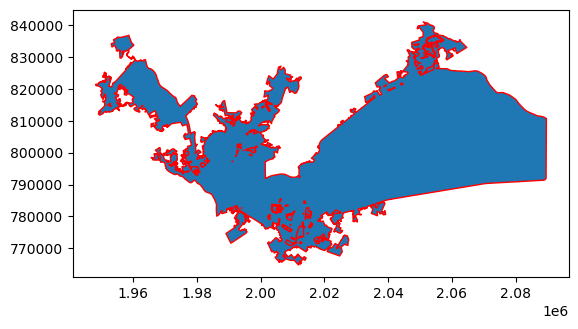

In [19]:
# Load the shapefile or GeoJSON file containing the boundary of Columbia
import geopandas as gpd
columbia_boundary = gpd.read_file('columbiacity.geojson')
columbia_boundary.plot(ax=plt.gca(), edgecolor='red', linewidth=1)

In [ ]:
# Creating the zone grid

In [5]:
from shapely.geometry import Point
import numpy as np

# Convert latitude and longitude coordinates to Point objects
df2['geometry'] = df2.apply(lambda row: Point(row['Start_Lng'], row['Start_Lat']), axis=1)

# Calculate the distance between two adjacent points using Haversine formula
def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0  # Earth radius in kilometers
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat / 2) ** 2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

# Assuming the first two rows represent two adjacent points
distance_km = haversine(df2['Start_Lat'].iloc[0], df2['Start_Lng'].iloc[0], df2['Start_Lat'].iloc[1], df2['Start_Lng'].iloc[1])

# Define the grid spacing (3km by 3km)
grid_spacing_km = 3
grid_spacing_deg = grid_spacing_km / distance_km

# Define the bounds of the grid based on the extent of your data
min_x, min_y = df2['Start_Lng'].min(), df2['Start_Lat'].min()
max_x, max_y = df2['Start_Lng'].max(), df2['Start_Lat'].max()

# Create a grid of points spaced at regular intervals
x_coords = np.arange(min_x, max_x, grid_spacing_deg)
y_coords = np.arange(min_y, max_y, grid_spacing_deg)
grid_points = [(x, y) for x in x_coords for y in y_coords]

# Group points in DataFrame into zones based on proximity to grid points
def assign_zone(row):
    distances = [haversine(row['Start_Lat'], row['Start_Lng'], p[1], p[0]) for p in grid_points]
    closest_point_idx = np.argmin(distances)
    return grid_points[closest_point_idx]

df2['zone'] = df2.apply(assign_zone, axis=1)


/var/folders/84/qq95gfbj1s5d3j1zwg6g04v00000gn/T/ipykernel_34278/1971271728.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['geometry'] = df2.apply(lambda row: Point(row['Start_Lng'], row['Start_Lat']), axis=1)
/var/folders/84/qq95gfbj1s5d3j1zwg6g04v00000gn/T/ipykernel_34278/1971271728.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zone'] = df2.apply(assign_zone, axis=1)


In [7]:
unique_zones = df2['zone'].unique()
print(unique_zones)

[(-80.9333772265225, 34.055657386738744)
 (-81.09440461326125, 34.055657386738744) (-80.9333772265225, 33.89463)
 (-80.77234983978374, 34.055657386738744) (-81.255432, 34.055657386738744)
 (-81.09440461326125, 33.89463)]


In [6]:
import numpy as np

# Define the conditions and corresponding values for z_prime
conditions = [
    (df2['zone'] == (-80.9333772265225, 34.055657386738744)),
    (df2['zone'] == (-81.09440461326125, 34.055657386738744)),
    (df2['zone'] == (-80.9333772265225, 33.89463)),
    (df2['zone'] == (-80.77234983978374, 34.055657386738744)),
    (df2['zone'] == (-81.255432, 34.055657386738744)),
    (df2['zone'] == (-81.09440461326125, 33.89463))
]
values = ['A', 'B', 'C', 'D', 'E', 'F']

# Use numpy.select() to create the z_prime column based on the conditions and values
df2['z_prime'] = np.select(conditions, values, default=None)


/var/folders/84/qq95gfbj1s5d3j1zwg6g04v00000gn/T/ipykernel_34278/549912232.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['z_prime'] = np.select(conditions, values, default=None)


In [7]:
unique_zones_prime = df2['z_prime'].unique()
print(unique_zones_prime)

['A' 'B' 'C' 'D' 'E' 'F']


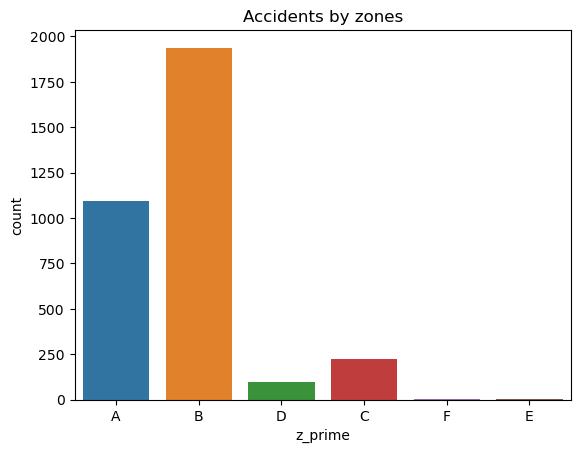

In [15]:
df3 = df2[df2['Severity'] == 1]
sns.countplot(data=df3, x='z_prime')
plt.title('Accidents by zones')
plt.show()

In [14]:
zone_counts = df3['z_prime'].value_counts().sort_index()
print(zone_counts)

A    1094
B    1938
C     224
D      96
E       5
F       2
Name: z_prime, dtype: int64


In [17]:
zone_counts = df2['z_prime'].value_counts().sort_index()
print(zone_counts)

A    11714
B     9467
C     1798
D      268
E      365
F       60
Name: z_prime, dtype: int64


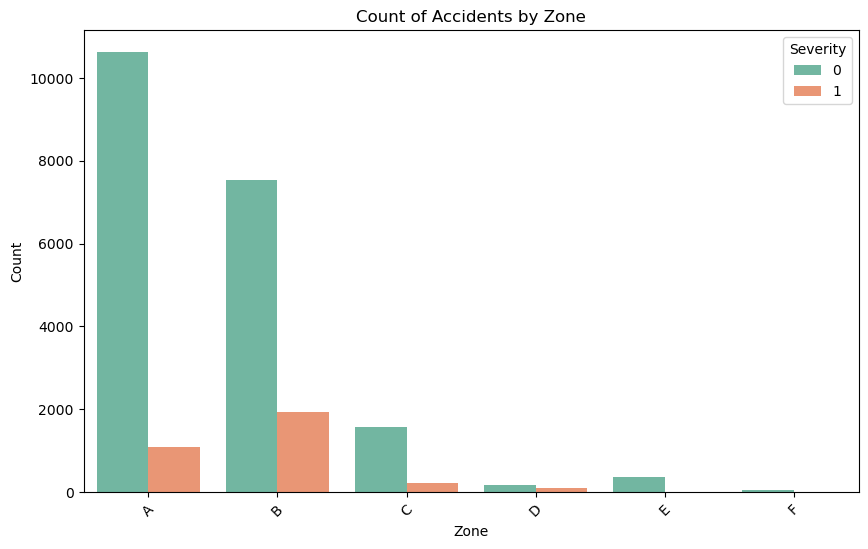

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by 'z_prime' and 'Severity' and count occurrences
zone_severity_counts = df2.groupby(['z_prime', 'Severity']).size().unstack(fill_value=0)

# Reset index to make 'z_prime' a column again
zone_severity_counts = zone_severity_counts.reset_index()

# Melt the DataFrame to long format
zone_severity_counts_melted = zone_severity_counts.melt(id_vars='z_prime', var_name='Severity', value_name='Count')

# Plot the stacked bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='z_prime', y='Count', hue='Severity', data=zone_severity_counts_melted, palette='Set2')
plt.title('Count of Accidents by Zone')
plt.xlabel('Zone')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Severity', loc='upper right')
plt.show()


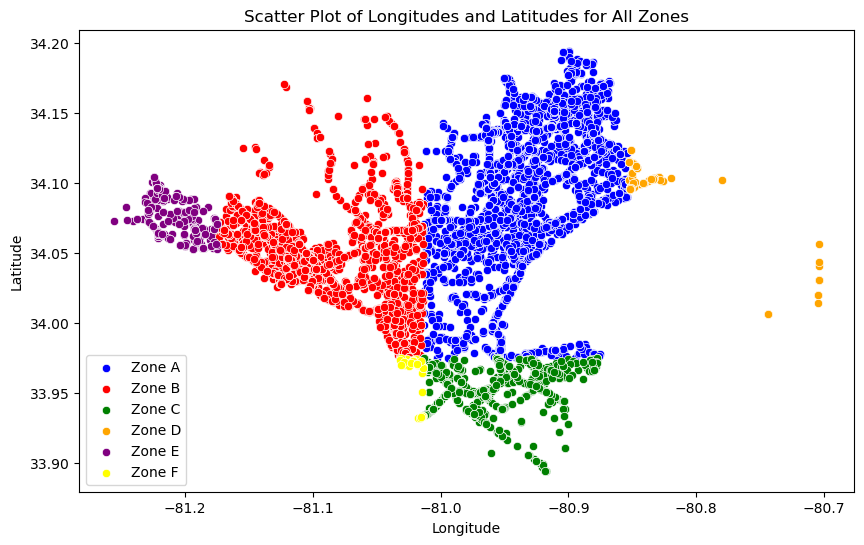

In [14]:
##Visualize by zones

import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame for each zone
df_z_prime_A = df2[df2['z_prime'] == 'A']
df_z_prime_B = df2[df2['z_prime'] == 'B']
df_z_prime_C = df2[df2['z_prime'] == 'C']
df_z_prime_D = df2[df2['z_prime'] == 'D']
df_z_prime_E = df2[df2['z_prime'] == 'E']
df_z_prime_F = df2[df2['z_prime'] == 'F']

# Create a scatter plot for each zone with seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df_z_prime_A, color='blue', label='Zone A')
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df_z_prime_B, color='red', label='Zone B')
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df_z_prime_C, color='green', label='Zone C')
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df_z_prime_D, color='orange', label='Zone D')
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df_z_prime_E, color='purple', label='Zone E')
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df_z_prime_F, color='yellow', label='Zone F')
plt.title('Scatter Plot of Longitudes and Latitudes for All Zones')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='lower left')
plt.show()


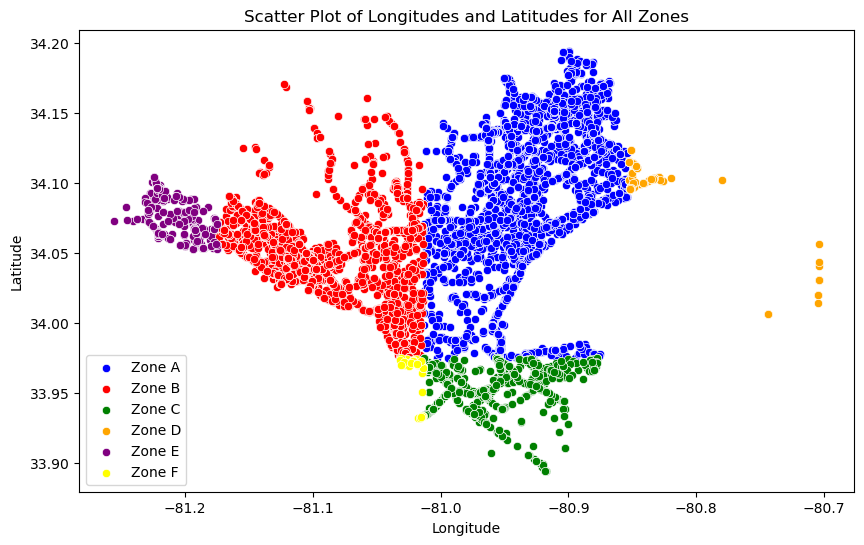

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import folium

# Filter the DataFrame for each zone
df_z_prime_A = df2[df2['z_prime'] == 'A']
df_z_prime_B = df2[df2['z_prime'] == 'B']
df_z_prime_C = df2[df2['z_prime'] == 'C']
df_z_prime_D = df2[df2['z_prime'] == 'D']
df_z_prime_E = df2[df2['z_prime'] == 'E']
df_z_prime_F = df2[df2['z_prime'] == 'F']

# Create a scatter plot for each zone with seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df_z_prime_A, color='blue', label='Zone A')
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df_z_prime_B, color='red', label='Zone B')
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df_z_prime_C, color='green', label='Zone C')
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df_z_prime_D, color='orange', label='Zone D')
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df_z_prime_E, color='purple', label='Zone E')
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df_z_prime_F, color='yellow', label='Zone F')
plt.title('Scatter Plot of Longitudes and Latitudes for All Zones')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='lower left')

# Create a folium map
map_columbia = folium.Map(location=[34.0000, -81.0350], zoom_start=10)

# Add markers for each zone
for index, row in df_z_prime_A.iterrows():
    folium.Marker([row['Start_Lat'], row['Start_Lng']], popup=row['zone']).add_to(map_columbia)
for index, row in df_z_prime_B.iterrows():
    folium.Marker([row['Start_Lat'], row['Start_Lng']], popup=row['zone']).add_to(map_columbia)
for index, row in df_z_prime_C.iterrows():
    folium.Marker([row['Start_Lat'], row['Start_Lng']], popup=row['zone']).add_to(map_columbia)
for index, row in df_z_prime_D.iterrows():
    folium.Marker([row['Start_Lat'], row['Start_Lng']], popup=row['zone']).add_to(map_columbia)
for index, row in df_z_prime_E.iterrows():
    folium.Marker([row['Start_Lat'], row['Start_Lng']], popup=row['zone']).add_to(map_columbia)
for index, row in df_z_prime_F.iterrows():
    folium.Marker([row['Start_Lat'], row['Start_Lng']], popup=row['zone']).add_to(map_columbia)

# Save the map to an HTML file
map_columbia.save('columbia_map.html')

plt.show()

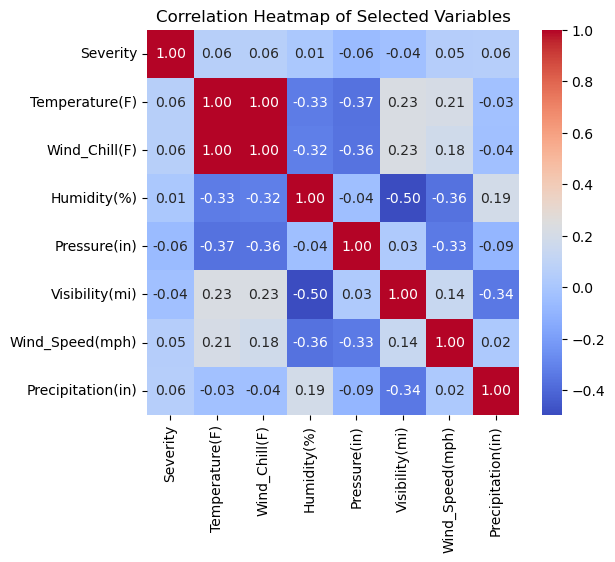

In [10]:
## Creating correlation heatmap

## CORR HEATMAP
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the variables
# If you haven't loaded your data into a DataFrame, you would first load it like this:
# df = pd.read_csv("your_data.csv")

# Selecting only the columns of interest
selected_variables = ['Severity', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)']
df_selected = df2[selected_variables]

# Calculating the correlation matrix
correlation_matrix = df_selected.corr()

# Creating the heatmap
plt.figure(figsize=(6,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selected Variables')
plt.show()

In [8]:
#creating final dataframe that wee will use train models

df_final = df2.drop(columns=['City', 'State','Weather_Timestamp'])

In [18]:
df_final.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Stop', 'Sunrise_Sunset', 'geometry', 'zone', 'z_prime'],
      dtype='object')

In [9]:
import pandas as pd

df_dummies = pd.get_dummies(df_final, columns=['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Stop', 'Sunrise_Sunset'])

# Display the DataFrame with dummy variables
# print(df_dummies)


In [10]:
import pandas as pd

# Filter rows where Severity is 1 and randomly select 2000 observations
df_severity_1 = df_dummies[df_dummies['Severity'] == 1].sample(n=2000, random_state=42)

# Filter rows where Severity is 0 and randomly select 3000 observations
df_severity_0 = df_dummies[df_dummies['Severity'] == 0].sample(n=3000, random_state=42)

# Concatenate the sampled DataFrames
df_sampled = pd.concat([df_severity_1, df_severity_0], ignore_index=True)

# Display the new DataFrame with randomly selected observations
df_sampled.head()


,Severity,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),...,Junction_True,No_Exit_False,No_Exit_True,Railway_False,Railway_True,Roundabout_False,Stop_False,Stop_True,Sunrise_Sunset_Day,Sunrise_Sunset_Night
0,1,33.950596,-80.971725,73.0,73.0,94.0,29.74,1.0,SSE,5.0,...,0,1,0,1,0,1,1,0,1,0
1,1,34.073734,-80.947777,36.0,36.0,89.0,29.94,10.0,CALM,0.0,...,1,1,0,1,0,1,1,0,1,0
2,1,34.064583,-81.044228,82.0,82.0,82.0,29.64,10.0,SW,6.0,...,0,1,0,1,0,1,1,0,1,0
3,1,34.021671,-80.946304,46.0,46.0,54.0,30.25,10.0,VAR,3.0,...,0,1,0,1,0,1,1,0,1,0
4,1,34.094822,-80.855927,90.0,90.0,24.0,29.76,10.0,SSW,5.0,...,0,1,0,1,0,1,1,0,1,0


In [22]:
df_dummies.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'z_prime', 'Amenity_False', 'Amenity_True',
       'Bump_False', 'Bump_True', 'Crossing_False', 'Crossing_True',
       'Give_Way_False', 'Give_Way_True', 'Junction_False', 'Junction_True',
       'No_Exit_False', 'No_Exit_True', 'Railway_False', 'Railway_True',
       'Roundabout_False', 'Stop_False', 'Stop_True', 'Sunrise_Sunset_Day',
       'Sunrise_Sunset_Night'],
      dtype='object')

In [35]:
df_final.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Stop',
       'Sunrise_Sunset', 'z_prime'],
      dtype='object')

In [11]:
df_final=df_final.drop(columns=['Weather_Condition','geometry', 'zone','Wind_Direction'])

# Training Models - Logistic regression


In [22]:
df_sampled.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'geometry',
       'zone', 'z_prime', 'Amenity_False', 'Amenity_True', 'Bump_False',
       'Bump_True', 'Crossing_False', 'Crossing_True', 'Give_Way_False',
       'Give_Way_True', 'Junction_False', 'Junction_True', 'No_Exit_False',
       'No_Exit_True', 'Railway_False', 'Railway_True', 'Roundabout_False',
       'Stop_False', 'Stop_True', 'Sunrise_Sunset_Day',
       'Sunrise_Sunset_Night'],
      dtype='object')

In [12]:
from sklearn.model_selection import train_test_split
# define X and Y for the logistic regression
y = df_sampled.drop(columns=['Start_Lat', 'Start_Lng', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)','zone', 'Amenity_False', 'Amenity_True',
       'Bump_False', 'Bump_True', 'Crossing_False', 'Crossing_True',
       'Give_Way_False', 'Give_Way_True', 'Junction_False', 'Junction_True',
       'No_Exit_False', 'No_Exit_True', 'Railway_False', 'Railway_True',
       'Roundabout_False', 'Stop_False', 'Stop_True', 'Sunrise_Sunset_Day',
       'Sunrise_Sunset_Night','Wind_Direction', 'Weather_Condition', 'geometry'])
X = df_sampled.drop(columns=['Severity','Weather_Condition','Wind_Direction', 'geometry','zone','Start_Lat', 'Start_Lng'])

## Test_train split
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.10)

In [38]:
X.columns

Index(['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'z_prime',
       'Amenity_False', 'Amenity_True', 'Bump_False', 'Bump_True',
       'Crossing_False', 'Crossing_True', 'Give_Way_False', 'Give_Way_True',
       'Junction_False', 'Junction_True', 'No_Exit_False', 'No_Exit_True',
       'Railway_False', 'Railway_True', 'Roundabout_False', 'Stop_False',
       'Stop_True', 'Sunrise_Sunset_Day', 'Sunrise_Sunset_Night'],
      dtype='object')

In [39]:
y.columns

Index(['Severity', 'z_prime'], dtype='object')

In [24]:
##62 ACCURACY
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0).fit(X_train[['Temperature(F)', 'Wind_Chill(F)','Visibility(mi)','Bump_False','Crossing_False','Give_Way_False','Junction_False','Stop_False']],y_train['Severity'])

In [51]:
##63 ACCURACY WITH THESE VARIABLES
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0).fit(X_train[['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)','Bump_False','Crossing_False','Give_Way_False','Junction_False','Stop_False']],y_train['Severity'])

/Volumes/Yacou_C/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
# Predict on the training data
y_pred_train = model.predict(X_train[['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)','Bump_False','Crossing_False','Give_Way_False','Junction_False','Stop_False']])
# Calculate the accuracy of the model on the training data
from sklearn.metrics import accuracy_score
accuracy_score(y_train['Severity'], y_pred_train)

0.6317777777777778

In [54]:
# evaluate the logistic regression model's out-of-sample performance using test data
y_pred=model.predict(X_test[['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)','Bump_False','Crossing_False','Give_Way_False','Junction_False','Stop_False']])

from sklearn.metrics import accuracy_score
accuracy_score(y_test['Severity'], y_pred) # proportion of correctly classified

0.634

In [55]:
model.classes_

array([0, 1])

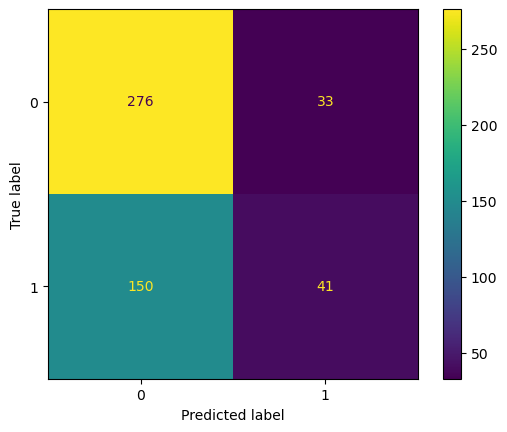

In [57]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test['Severity'], y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [58]:
import pandas as pd


# Obtain probabilities of each class for each test instance
proba_results = model.predict_proba(X_test[['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)','Bump_False','Crossing_False','Give_Way_False','Junction_False','Stop_False']])

# Obtain predicted class labels for each test instance
y_pred = model.predict(X_test[['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)','Bump_False','Crossing_False','Give_Way_False','Junction_False','Stop_False']])

# Create a DataFrame to store the probabilities and predicted class labels
proba_df = pd.DataFrame(proba_results, columns=model.classes_)
proba_df['predicted_class'] = y_pred

# Display the DataFrame with probabilities and predicted class labels
print(proba_df)


            0         1  predicted_class
0    0.633234  0.366766                0
1    0.516527  0.483473                0
2    0.683734  0.316266                0
3    0.706903  0.293097                0
4    0.607101  0.392899                0
..        ...       ...              ...
495  0.523631  0.476369                0
496  0.688035  0.311965                0
497  0.584430  0.415570                0
498  0.597160  0.402840                0
499  0.712015  0.287985                0

[500 rows x 3 columns]


In [59]:
# Use value_counts() to count the occurrences of each predicted class label
predicted_counts = proba_df['predicted_class'].value_counts()

# Extract the count of instances predicted to be class 1 (assuming class 1 is represented as 1)
count_class_1 = predicted_counts.get(1, 0)  # Get the count of instances predicted as class 1, default to 0 if class 1 is not present

print("Number of instances predicted as class 1:", count_class_1)


Number of instances predicted as class 1: 74


In [61]:
import pandas as pd

# Assuming X_test is your test data
# Obtain probabilities of each class for each test instance
proba_results = model.predict_proba(X_test[['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)','Bump_False','Crossing_False','Give_Way_False','Junction_False','Stop_False']])

# Obtain predicted class labels for each test instance
y_pred = model.predict(X_test[['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)','Bump_False','Crossing_False','Give_Way_False','Junction_False','Stop_False']])

# Create a DataFrame to store the probabilities and predicted class labels
proba_df = pd.DataFrame(proba_results, columns=model.classes_)
proba_df['predicted_class'] = y_pred

# Concatenate with actual class (y_test)
proba_df['actual_class'] = y_test['Severity'].values  # Assuming y_test is a pandas Series or DataFrame

# Display the DataFrame with probabilities, predicted class labels, and actual class labels
print(proba_df)


            0         1  predicted_class  actual_class
0    0.633234  0.366766                0             0
1    0.516527  0.483473                0             1
2    0.683734  0.316266                0             1
3    0.706903  0.293097                0             0
4    0.607101  0.392899                0             0
..        ...       ...              ...           ...
495  0.523631  0.476369                0             0
496  0.688035  0.311965                0             0
497  0.584430  0.415570                0             0
498  0.597160  0.402840                0             1
499  0.712015  0.287985                0             0

[500 rows x 4 columns]


In [64]:
zones = X_test['z_prime']
print(zones)

4220    C
124     A
1403    A
3338    A
4152    A
       ..
2291    A
2694    A
4754    A
698     B
2387    B
Name: z_prime, Length: 500, dtype: object


In [65]:
# Convert the Series 'zones' to a DataFrame
zones_df = zones.to_frame()
zones_df.reset_index(drop=True, inplace=True)
# Display the resulting DataFrame
print(zones_df)

    z_prime
0         C
1         A
2         A
3         A
4         A
..      ...
495       A
496       A
497       A
498       B
499       B

[500 rows x 1 columns]


In [66]:
# Assuming zones_df and proba_df are your DataFrames
merged_logistic = proba_df.merge(zones_df, left_index=True, right_index=True)

# Display the merged DataFrame
print(merged_logistic)

            0         1  predicted_class  actual_class z_prime
0    0.633234  0.366766                0             0       C
1    0.516527  0.483473                0             1       A
2    0.683734  0.316266                0             1       A
3    0.706903  0.293097                0             0       A
4    0.607101  0.392899                0             0       A
..        ...       ...              ...           ...     ...
495  0.523631  0.476369                0             0       A
496  0.688035  0.311965                0             0       A
497  0.584430  0.415570                0             0       A
498  0.597160  0.402840                0             1       B
499  0.712015  0.287985                0             0       B

[500 rows x 5 columns]


In [67]:
merged_logistic.columns

Index([0, 1, 'predicted_class', 'actual_class', 'z_prime'], dtype='object')

In [68]:
# merged_df is merged DataFrame
sorted_df = merged_logistic.sort_values(by=1, ascending=False)

# Display the sorted DataFrame
print(sorted_df)

            0         1  predicted_class  actual_class z_prime
448  0.261126  0.738874                1             0       B
416  0.290819  0.709181                1             0       B
413  0.304445  0.695555                1             0       B
321  0.314763  0.685237                1             0       B
58   0.324465  0.675535                1             1       B
..        ...       ...              ...           ...     ...
149  0.973808  0.026192                0             0       B
396  0.975227  0.024773                0             0       A
339  0.976088  0.023912                0             0       A
199  0.978973  0.021027                0             0       B
76   0.980381  0.019619                0             0       A

[500 rows x 5 columns]


In [70]:
# save output
# sorted_df.to_excel('logistic_ev.xlsx', index=True)

In [13]:
#Standard libraries for data analysis:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# sklearn modules for data preprocessing:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#sklearn modules for Model Evaluation & Improvement:
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import auc, roc_auc_score, roc_curve

import warnings
warnings.simplefilter("ignore")

In [33]:
df_sampled.columns

Index(['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'z_prime',
       'Amenity_False', 'Amenity_True', 'Bump_False', 'Bump_True',
       'Crossing_False', 'Crossing_True', 'Give_Way_False', 'Give_Way_True',
       'Junction_False', 'Junction_True', 'No_Exit_False', 'No_Exit_True',
       'Railway_False', 'Railway_True', 'Roundabout_False', 'Stop_False',
       'Stop_True', 'Sunrise_Sunset_Day', 'Sunrise_Sunset_Night', 'Severity'],
      dtype='object')

In [84]:
X.columns

Index(['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'z_prime',
       'Amenity_False', 'Amenity_True', 'Bump_False', 'Bump_True',
       'Crossing_False', 'Crossing_True', 'Give_Way_False', 'Give_Way_True',
       'Junction_False', 'Junction_True', 'No_Exit_False', 'No_Exit_True',
       'Railway_False', 'Railway_True', 'Roundabout_False', 'Stop_False',
       'Stop_True', 'Sunrise_Sunset_Day', 'Sunrise_Sunset_Night'],
      dtype='object')

In [14]:
df_sampled=df_sampled.drop(columns=['Start_Lat', 'Start_Lng','Wind_Direction','geometry', 'zone'])

In [15]:
df_sampled=df_sampled.drop(columns=['Weather_Condition'])

In [20]:
df_sampled.columns

Index(['Severity', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'z_prime', 'Amenity_False', 'Amenity_True',
       'Bump_False', 'Bump_True', 'Crossing_False', 'Crossing_True',
       'Give_Way_False', 'Give_Way_True', 'Junction_False', 'Junction_True',
       'No_Exit_False', 'No_Exit_True', 'Railway_False', 'Railway_True',
       'Roundabout_False', 'Stop_False', 'Stop_True', 'Sunrise_Sunset_Day',
       'Sunrise_Sunset_Night'],
      dtype='object')

In [21]:
df_sampled2 = df_sampled.drop(columns=['Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Amenity_False', 'Amenity_True',
       'Bump_False', 'Bump_True', 'Crossing_False', 'Crossing_True',])

In [15]:
df_sampled.columns

Index(['Severity', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'z_prime', 'Amenity_False',
       'Amenity_True', 'Bump_False', 'Bump_True', 'Crossing_False',
       'Crossing_True', 'Give_Way_False', 'Give_Way_True', 'Junction_False',
       'Junction_True', 'No_Exit_False', 'No_Exit_True', 'Railway_False',
       'Railway_True', 'Roundabout_False', 'Stop_False', 'Stop_True',
       'Sunrise_Sunset_Day', 'Sunrise_Sunset_Night'],
      dtype='object')

In [22]:
print(df_sampled2.columns)

Index(['Severity', 'z_prime', 'Give_Way_False', 'Give_Way_True',
       'Junction_False', 'Junction_True', 'No_Exit_False', 'No_Exit_True',
       'Railway_False', 'Railway_True', 'Roundabout_False', 'Stop_False',
       'Stop_True', 'Sunrise_Sunset_Day', 'Sunrise_Sunset_Night'],
      dtype='object')


In [122]:
df_sampled2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Give_Way_False        5000 non-null   uint8
 1   Give_Way_True         5000 non-null   uint8
 2   Junction_False        5000 non-null   uint8
 3   Junction_True         5000 non-null   uint8
 4   No_Exit_False         5000 non-null   uint8
 5   No_Exit_True          5000 non-null   uint8
 6   Railway_False         5000 non-null   uint8
 7   Railway_True          5000 non-null   uint8
 8   Roundabout_False      5000 non-null   uint8
 9   Stop_False            5000 non-null   uint8
 10  Stop_True             5000 non-null   uint8
 11  Sunrise_Sunset_Day    5000 non-null   uint8
 12  Sunrise_Sunset_Night  5000 non-null   uint8
 13  Severity              5000 non-null   int64
dtypes: int64(1), uint8(13)
memory usage: 102.7 KB


In [120]:
## Ignore
import pandas as pd

# Extract the Severity column
severity_column = df_sampled2['Severity']

# Drop the Severity column from the DataFrame
df_sampled2 = df_sampled2.drop(columns=['Severity'])

# Concatenate the Severity column to the DataFrame as the last column
df_sampled2 = pd.concat([df_sampled2, severity_column], axis=1)

# Now df_sampled2 has Severity as the last column


In [23]:
import pandas as pd

# Extract the Severity column
severity_column = df_sampled['Severity']

# Drop the Severity column from the DataFrame
df_sampled = df_sampled.drop(columns=['Severity'])

# Concatenate the Severity column to the DataFrame as the last column
df_sampled = pd.concat([df_sampled, severity_column], axis=1)

# Now df_sampled has Severity as the last column


In [24]:
df_sampled.columns

Index(['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'z_prime',
       'Amenity_False', 'Amenity_True', 'Bump_False', 'Bump_True',
       'Crossing_False', 'Crossing_True', 'Give_Way_False', 'Give_Way_True',
       'Junction_False', 'Junction_True', 'No_Exit_False', 'No_Exit_True',
       'Railway_False', 'Railway_True', 'Roundabout_False', 'Stop_False',
       'Stop_True', 'Sunrise_Sunset_Day', 'Sunrise_Sunset_Night', 'Severity'],
      dtype='object')

In [18]:
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature(F)        5000 non-null   float64
 1   Wind_Chill(F)         5000 non-null   float64
 2   Humidity(%)           5000 non-null   float64
 3   Pressure(in)          5000 non-null   float64
 4   Visibility(mi)        5000 non-null   float64
 5   Wind_Speed(mph)       5000 non-null   float64
 6   Precipitation(in)     5000 non-null   float64
 7   Weather_Condition     5000 non-null   object 
 8   z_prime               5000 non-null   object 
 9   Amenity_False         5000 non-null   uint8  
 10  Amenity_True          5000 non-null   uint8  
 11  Bump_False            5000 non-null   uint8  
 12  Bump_True             5000 non-null   uint8  
 13  Crossing_False        5000 non-null   uint8  
 14  Crossing_True         5000 non-null   uint8  
 15  Give_Way_False       

In [18]:
# Label Encode Categorical Features

#Create a label encoder object
le = LabelEncoder()
# Encode for all categorical features
le_count = 0
for col in df_sampled.columns[:-1]: # -1 because the first column in this example is the target variable
    if df_sampled[col].dtype == 'object':
        le.fit(df_sampled[col])
        df_sampled[col] = le.transform(df_sampled[col])
        le_count += 1
print('{} columns were label encoded.'.format(le_count))

1 columns were label encoded.


In [124]:
df_sampled2.columns

Index(['Give_Way_False', 'Give_Way_True', 'Junction_False', 'Junction_True',
       'No_Exit_False', 'No_Exit_True', 'Railway_False', 'Railway_True',
       'Roundabout_False', 'Stop_False', 'Stop_True', 'Sunrise_Sunset_Day',
       'Sunrise_Sunset_Night', 'Severity'],
      dtype='object')

In [79]:
X_train.columns

Index(['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'z_prime',
       'Amenity_False', 'Amenity_True', 'Bump_False', 'Bump_True',
       'Crossing_False', 'Crossing_True', 'Give_Way_False', 'Give_Way_True',
       'Junction_False', 'Junction_True', 'No_Exit_False', 'No_Exit_True',
       'Railway_False', 'Railway_True', 'Roundabout_False', 'Stop_False',
       'Stop_True', 'Sunrise_Sunset_Day', 'Sunrise_Sunset_Night'],
      dtype='object')

In [1]:
##Ignore
# Prepare for X and y
#y = df_sampled2['Severity']
#X = df_sampled2.drop('Severity',axis=1)
# X = pd.get_dummies(data=X, drop_first=True) # sklearn trees only deals with numeric features

# randomly split into training and test
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.70) # here we use 70% test data; feel free to change

In [97]:
X = pd.get_dummies(data=X, drop_first=True)

In [47]:
# Note that same vars as in logistic
# Prepare for X and y
y = df_sampled[['Severity','z_prime']]
X = df_sampled[['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
                'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)',
                'Bump_False', 'Crossing_False', 'Give_Way_False', 'Junction_False', 'Stop_False']]
#X = pd.get_dummies(data=X, drop_first=True) # sklearn trees only deal with numeric features

# randomly split into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [27]:
X_train.columns

Index(['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Bump_False',
       'Crossing_False', 'Give_Way_False', 'Junction_False', 'Stop_False'],
      dtype='object')

In [28]:
y_test.columns

Index(['Severity'], dtype='object')

In [30]:
# Initialize classifiers in consideration
models = []
models.append(('Logistic Regression', LogisticRegression()))
#models.append(('SVC', SVC(kernel = 'linear')))
models.append(('Kernel SVM', SVC(kernel = 'rbf')))
#models.append(('KNN', KNeighborsClassifier(n_neighbors = 3)))
#models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier(criterion = 'entropy')))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy')))

#Evaluating Model Results:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'AUC Mean', 'AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)

# Evaluate each model using k-fold cross-validation:
i = 0
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    # accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(model, X_train,y_train, cv=kfold, scoring='accuracy')
    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
    
model_results.sort_values(by=['AUC Mean'], ascending=False)

,Algorithm,AUC Mean,AUC STD,Accuracy Mean,Accuracy STD
3,Random Forest,67.36,2.48,63.37,2.21
0,Logistic Regression,65.37,2.85,62.38,1.95
1,Kernel SVM,63.79,2.17,59.75,2.35
2,Decision Tree Classifier,57.28,3.24,59.10,2.26


# Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [34]:
class_RF = RandomForestClassifier(n_estimators=100, criterion ='entropy').fit(scale(X_train), y_train) 

In [35]:
from sklearn.metrics import accuracy_score

# Make predictions on the test data
y_pred = class_RF.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.638


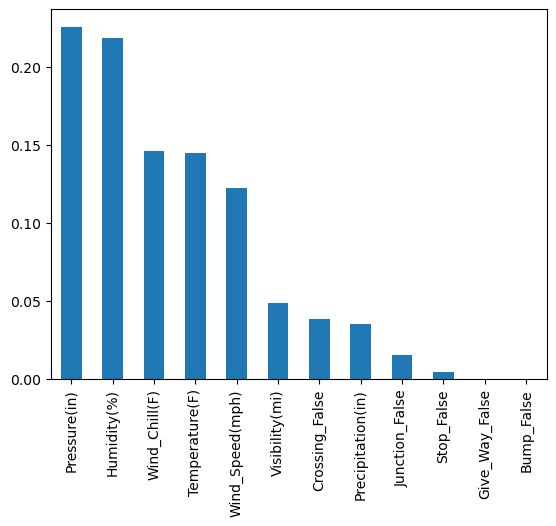

In [46]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(regr_RF.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

## HYPERPARAMETER TUNING

In [37]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['sqrt', 'log2',None]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['sqrt', 'log2', None], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [40]:
# Use the random grid to search for best hyperparameters
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Volumes/Yacou_C/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Volumes/Yacou_C/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Volumes/Yacou_C/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Volumes/Yacou_C/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=42, verbose=2)

In [41]:
rf_random.best_params_

{'n_estimators': 522,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 10,
 'bootstrap': False}

In [42]:
best_rf = rf_random.best_estimator_

In [ ]:
y_pred=best_rf.predict(scale(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

In [49]:
from sklearn.metrics import accuracy_score

# Make predictions on the test data
y_pred = best_rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test['Severity'], y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.744


In [53]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Make predictions and predict probabilities on the test data
y_pred = best_rf.predict(X_test)
y_pred_prob = best_rf.predict_proba(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test['Severity'], y_pred)
print(f"Accuracy: {accuracy}")

# Create a DataFrame with actual Severity, z_prime, predicted Severity, and predicted probabilities
result_df = pd.DataFrame({
    'Actual_Severity': y_test['Severity'],
    'z_prime': y_test['z_prime'],
    'Predicted_Severity': y_pred,
    'Predicted_Probability_Severity_0': y_pred_prob[:, 0],  # Probability of Severity 0
    'Predicted_Probability_Severity_1': y_pred_prob[:, 1]   # Probability of Severity 1
})

# Print the first few rows of the result DataFrame
print(result_df.head())


Accuracy: 0.744
      Actual_Severity z_prime  Predicted_Severity  \
364                 1       B                   1   
3806                0       C                   0   
4042                0       A                   0   
1178                1       B                   0   
662                 1       B                   1   

      Predicted_Probability_Severity_0  Predicted_Probability_Severity_1  
364                           0.107956                          0.892044  
3806                          0.637757                          0.362243  
4042                          0.688378                          0.311622  
1178                          0.634616                          0.365384  
662                           0.471609                          0.528391  


In [54]:
len(result_df)

500

In [55]:
# Export the DataFrame to an Excel file
result_df.to_excel('predictions_rf.xlsx', index=False)
